In [204]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

In [192]:
df = pd.read_csv('/content/drive/My Drive/datasets/Company_Stock_and_Investment.csv')

In [193]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [195]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)


In [196]:
df_cp = df

In [197]:
df.set_index('Date',inplace=True)

In [198]:
df.head()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-01-04,0.026830,0.001097,0.015565,-0.004609
2010-01-05,0.002699,0.001560,0.001729,0.005900
2010-01-06,0.021688,0.006009,-0.015906,-0.018116
2010-01-07,-0.006256,0.000221,-0.001849,-0.017013


In [199]:
data=df.drop(['Gold Investments','Comp Stock','Other sharesInvestments'],axis=1)

In [200]:
data.head()


,Oil Investments
Date,
2009-12-31,0.025417
2010-01-04,0.026830
2010-01-05,0.002699
2010-01-06,0.021688
2010-01-07,-0.006256


In [201]:
data=data.asfreq('D',method='pad')


In [202]:
data.describe()

,Oil Investments
count,2877.000000
mean,-0.000532
std,0.033754
min,-1.000000
25%,-0.011118
50%,0.000399
75%,0.010648
max,0.119511


In [205]:
start_date = datetime(2009,12,31)
end_date = datetime(2017,6,30)

In [206]:
data=data[start_date:end_date]


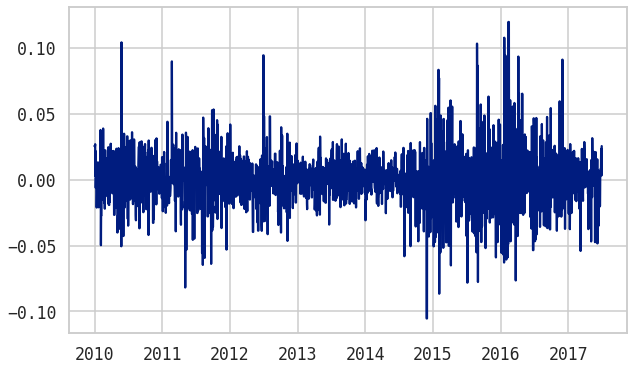

In [208]:
plt.figure(figsize=(10,6))
plt.plot(data)

In [209]:
from statsmodels.tsa.stattools import adfuller


In [211]:
data['First Difference'] = data['Oil Investments'] - data['Oil Investments'].shift(1)

In [212]:
data['Oil Investments'].shift(1).head()

Date
2009-12-31         NaN
2010-01-01    0.025417
2010-01-02    0.025417
2010-01-03    0.025417
2010-01-04    0.025417
Freq: D, Name: Oil Investments, dtype: float64

In [213]:
data['Seasonal First Difference']=data['Oil Investments']-data['Oil Investments'].shift(365)

In [214]:
#H1: It is stationary

def adfuller_test(data1):
    result=adfuller(data1) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [215]:
adfuller_test(data['Seasonal First Difference'].dropna())


ADF Test Statistic : -17.440049159911208
p-value : 4.7148694422513786e-30
#Lags Used : 8
Number of Observations Used : 2365
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


As plot shows constant values over time and no specific trend or seasonal representation, so the forecasting cannot be done.

In [217]:
data=df.drop(['Oil Investments','Comp Stock','Other sharesInvestments'],axis=1)

In [221]:
df.head()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-01-04,0.026830,0.001097,0.015565,-0.004609
2010-01-05,0.002699,0.001560,0.001729,0.005900
2010-01-06,0.021688,0.006009,-0.015906,-0.018116
2010-01-07,-0.006256,0.000221,-0.001849,-0.017013


In [222]:
df = pd.read_csv('/content/drive/My Drive/datasets/Company_Stock_and_Investment.csv')

In [223]:
df_cp=df

In [225]:
df=df_cp.drop(['Oil Investments','Comp Stock','Other sharesInvestments'],axis=1)

In [226]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [227]:
df.Date

0      2009-12-31
1      2010-01-04
2      2010-01-05
3      2010-01-06
4      2010-01-07
          ...    
1979   2017-11-09
1980   2017-11-10
1981   2017-11-13
1982   2017-11-14
1983   2017-11-15
Name: Date, Length: 1984, dtype: datetime64[ns]

In [228]:
df.set_index('Date',inplace=True)

In [229]:
df=df.resample('M').mean()

In [231]:
df.describe()


,Gold Investments
count,96.000000
mean,-0.019533
std,0.031323
min,-0.102125
25%,-0.045374
50%,-0.001376
75%,0.000874
max,0.005398


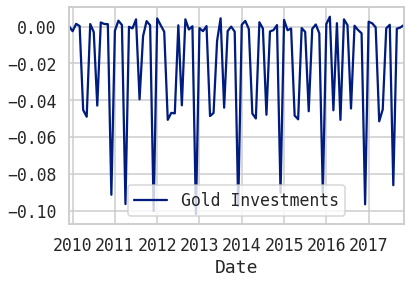

In [232]:
df.plot()

In [235]:
adfuller_test(df['Gold Investments'])

ADF Test Statistic : -4.107779557995716
p-value : 0.0009402414309087697
#Lags Used : 11
Number of Observations Used : 84
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


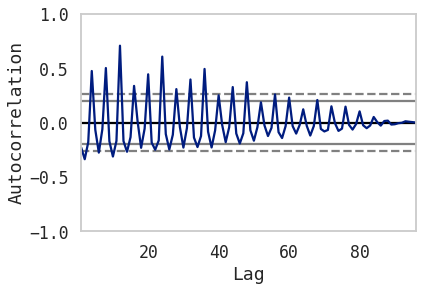

In [237]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()

In [238]:
x_train,y_train=df[0:72],df[72:]

In [239]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

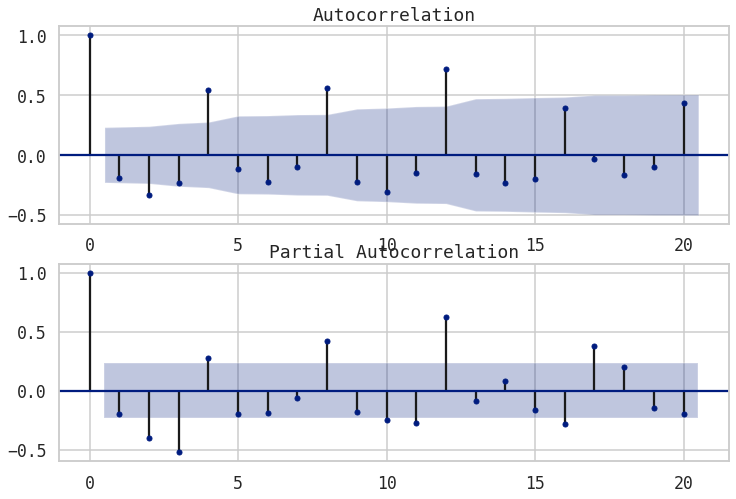

In [240]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = plot_acf(x_train,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(x_train,lags=20,ax=ax2)

In [241]:
from statsmodels.tsa.seasonal import seasonal_decompose

[]

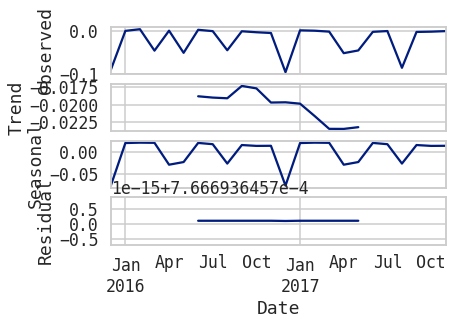

In [242]:
ts_decompose=seasonal_decompose(y_train,model='additive')
ts_decompose.plot()
plt.plot()

In [243]:
from statsmodels.tsa.arima_model import ARIMA

In [244]:
model=ARIMA(df,order=(1,0,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

In [245]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Gold Investments   No. Observations:                   96
Model:                     ARMA(1, 1)   Log Likelihood                 213.976
Method:                       css-mle   S.D. of innovations              0.026
Date:                Sun, 01 Nov 2020   AIC                           -419.952
Time:                        18:07:49   BIC                           -409.694
Sample:                    12-31-2009   HQIC                          -415.805
                         - 11-30-2017                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0202      0.000    -47.418      0.000      -0.021      -0.019
ar.L1.Gold Investments     0.2276      0.131      1.737      0.086      -0.029       0.484
ma.L1.Gold Investments    -0.8904      0.078    -11.472      0.000      -1.043      -0.738
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.3937           +0.0000j            4.3937            0.0000
MA.1            1.1230           +0.0000j            1.1230            0.0000
-----------------------------------------------------------------------------
"""

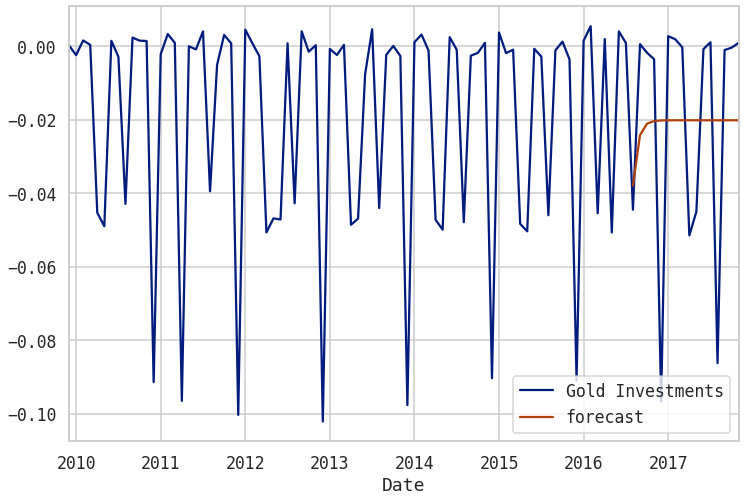

In [246]:
df['forecast']=model_fit.predict(start=80,end=96,dynamic=True)
df[['Gold Investments','forecast']].plot(figsize=(12,8))

In [247]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [248]:
model=sm.tsa.statespace.SARIMAX(x_train,order=(1, 1, 0),seasonal_order=(1,1,0,12)) #(p,d,q,Shift)
results=model.fit()

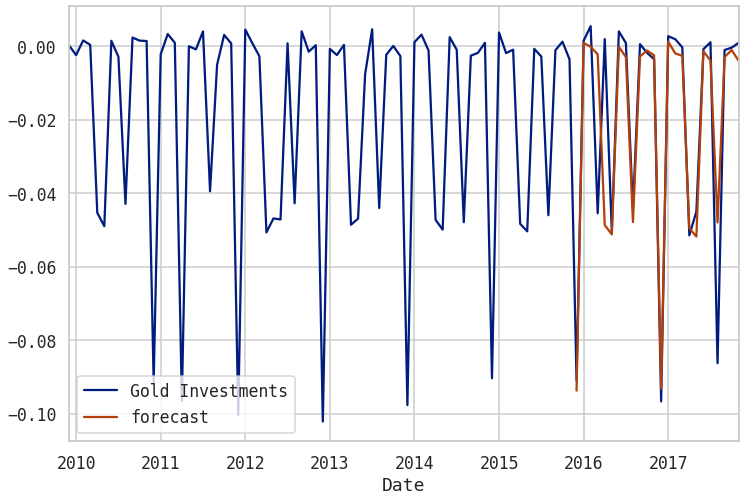

In [249]:
df['forecast']=results.predict(start=72,end=96,dynamic=True)
df[['Gold Investments','forecast']].plot(figsize=(12,8))

In [256]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [257]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [258]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [259]:
future_datest_df.tail()

,Gold Investments,forecast
2021-06-30,NaN,NaN
2021-07-30,NaN,NaN
2021-08-30,NaN,NaN
2021-09-30,NaN,NaN
2021-10-30,NaN,NaN


In [260]:
future_df=pd.concat([df,future_datest_df])

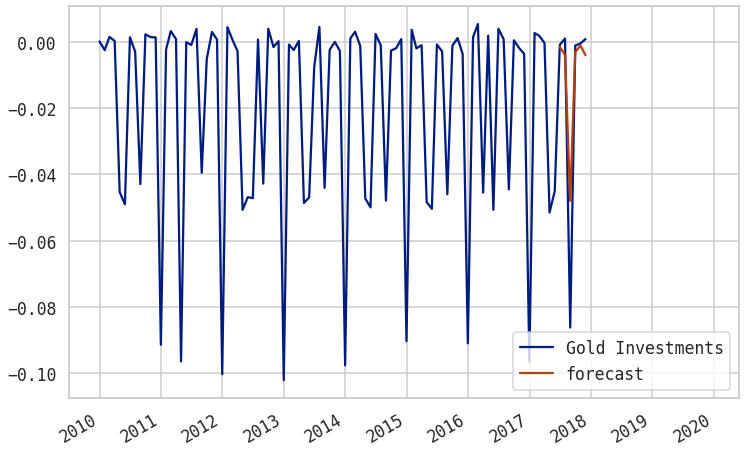

In [261]:

future_df['forecast'] = results.predict(start = 90, end = 120, dynamic= True)  
future_df[['Gold Investments', 'forecast']].plot(figsize=(12, 8))

In [262]:
df = pd.read_csv('/content/drive/My Drive/datasets/Company_Stock_and_Investment.csv')

In [263]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [265]:
df_cp=df

In [266]:
df_cp.Date=df_cp['Date'].apply(lambda x:x.strftime('%Y-%m'))


In [267]:
data=df_cp.drop(['Oil Investments','Gold Investments','Other sharesInvestments'],axis=1)

In [268]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)

In [269]:
data.set_index('Date',inplace=True)


In [270]:
data=data.resample('M').mean()


In [271]:
data.tail()


,Comp Stock
Date,
2017-07-31,0.001640
2017-08-31,0.004368
2017-09-30,-0.003051
2017-10-31,0.004275
2017-11-30,0.000092


In [272]:
data.describe()


,Comp Stock
count,96.000000
mean,0.001162
std,0.003704
min,-0.006997
25%,-0.000842
50%,0.000888
75%,0.003277
max,0.017354


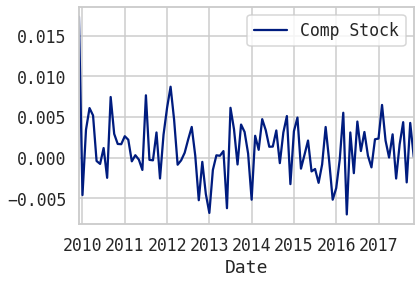

In [273]:
data.plot()


In [275]:
adfuller_test(data['Comp Stock'])


ADF Test Statistic : -11.257176132464247
p-value : 1.6560213346906978e-20
#Lags Used : 0
Number of Observations Used : 95
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


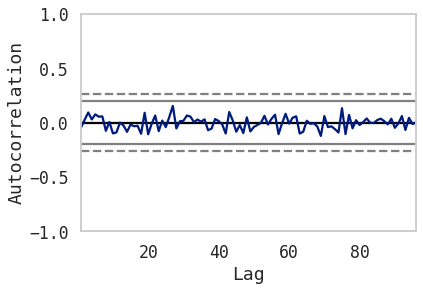

In [276]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
plt.show()

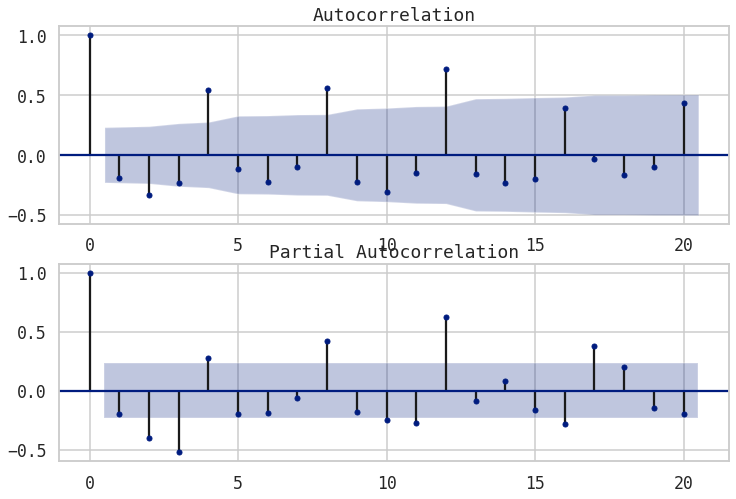

In [277]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = plot_acf(x_train,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(x_train,lags=20,ax=ax2)

In [278]:
model=sm.tsa.statespace.SARIMAX(x_train,order=(1, 0,1),seasonal_order=(1,0,1,12)) #(p,d,q,Shift)
results=model.fit()

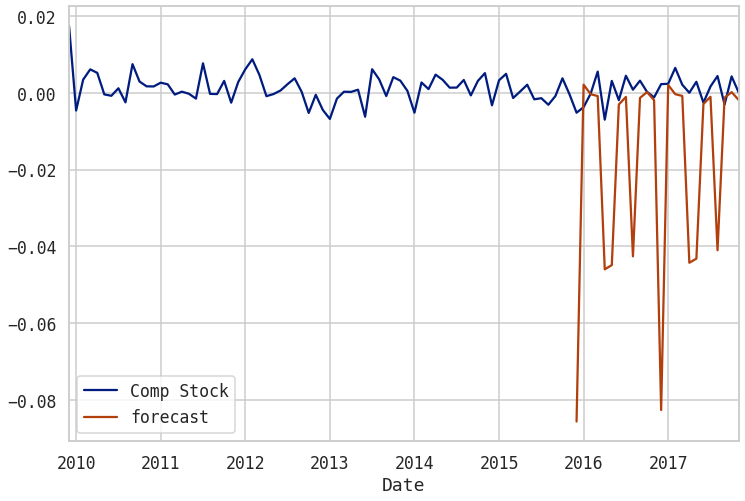

In [280]:

data['forecast']=results.predict(start=72,end=96,dynamic=True)
data[['Comp Stock','forecast']].plot(figsize=(12,8))